In [3]:
import numpy as np
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
with open("data/images_l.pkl", 'rb') as f:
    labeled_images = pickle.load(f)
with open("data/labels_l.pkl", 'rb') as f:
    labels = pickle.load(f)
with open("data/images_ul.pkl", 'rb') as f:
    unlabeled_images = pickle.load(f)
with open("data/images_test.pkl", 'rb') as f:
    images_test = pickle.load(f)

print(np.shape(labeled_images))

(30000, 56, 56)


In [5]:
import matplotlib.pyplot as plt # Plotting utils
from mpl_toolkits.axes_grid1 import ImageGrid # More plotting...
import numpy as np; import math # Numpy and math

# Plots a single row of images
def __plot_image_row(data):
    num_plots = data.shape[0]
    fig = plt.figure(figsize=(num_plots, 10.*num_plots))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, num_plots), axes_pad=0.1)
    for i in range(num_plots):
        grid[i].imshow(data[i].reshape((56, 56)))
    plt.show()

# Plots a series of rows of images given a range
def plot_images(data, total_digit_range = None, row_size = 10):
    if (total_digit_range == None): total_digit_range = range(0, len(data))
    num_rows =  math.ceil(total_digit_range.stop / row_size)
    rows = [i * row_size for i in range(0, num_rows)]
    rows = [range(max(total_digit_range.start, start), min(start + row_size, total_digit_range.stop)) for start in rows]
    for row in rows: __plot_image_row(np.array([data[i] for i in row]))

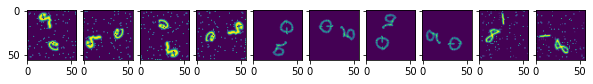

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1]


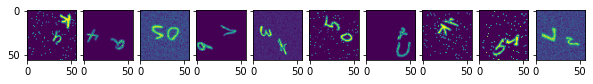

(2, 2, 2, 1, 3, 1, 0, 3, 2, 3)


In [18]:
import random

rotated_images = []
rotated_image_labels = []
for img in labeled_images:

    # No rotation
    rotated_images.append(img)
    rotated_image_labels.append(0)

    # 90 degrees
    img_rot_90 = np.rot90(img)
    rotated_images.append(img_rot_90)
    rotated_image_labels.append(1)

    img_rot_180 = np.rot90(img_rot_90)
    rotated_images.append(img_rot_180)
    rotated_image_labels.append(2)

    img_rot_270 = np.rot90(img_rot_180)
    rotated_images.append(img_rot_270)
    rotated_image_labels.append(3)

# Print before shuffling
plot_images(rotated_images, range(0, 10))
print(rotated_image_labels[:10])

randomized_images = list(zip(rotated_images, rotated_image_labels))
random.shuffle(randomized_images)
randomized_images, randomized_image_labels = zip(*randomized_images)

# Print before shuffling
plot_images(randomized_images, range(0, 10))
print(randomized_image_labels[:10])